# Homework 4

In [609]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from scipy import interpolate
from scipy import stats

In [2]:
data_path = "D:/Artificial Intelligence/MITMicroMasters/DataAnalysis/Module4/Homework/CO2.csv"
dataset = pd.read_csv(data_path, header = 54, names = ["Yr", "Mn", "Date Excel", "Date", "CO2 ppm",
                                                         "seasonally adjusted ppm",
                                                         "fit","seasonally adjusted fit ppm", "CO2 filled ppm",
                                                         "seasonally adjusted filled ppm"], skiprows = 2)
dataset.head()

,Yr,Mn,Date Excel,Date,CO2 ppm,seasonally adjusted ppm,fit,seasonally adjusted fit ppm,CO2 filled ppm,seasonally adjusted filled ppm
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71


In [3]:
# Preprocessing as required by having only column 5 and droping NA (-99) values
dataset_preprocessed = dataset.iloc[:,4]
dataset_preprocessed = dataset_preprocessed[dataset_preprocessed != -99.99]
dataset_preprocessed.head()

2    315.70
3    317.45
4    317.51
6    315.86
7    314.93
Name: CO2 ppm, dtype: float64

In [4]:
dataset_clean = dataset[dataset['CO2 ppm'] != -99.99]
dataset_clean

,Yr,Mn,Date Excel,Date,CO2 ppm,seasonally adjusted ppm,fit,seasonally adjusted fit ppm,CO2 filled ppm,seasonally adjusted filled ppm
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.21,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19
...,...,...,...,...,...,...,...,...,...,...
736,2019,5,43600,2019.3699,414.83,411.42,414.53,411.12,414.83,411.42
737,2019,6,43631,2019.4548,413.96,411.38,413.89,411.33,413.96,411.38
738,2019,7,43661,2019.5370,411.85,411.03,412.32,411.54,411.85,411.03
739,2019,8,43692,2019.6219,410.08,411.62,410.17,411.75,410.08,411.62


In [5]:
len(dataset_preprocessed)

734

In [6]:
len(dataset)

744

In [7]:
dataset.head()

,Yr,Mn,Date Excel,Date,CO2 ppm,seasonally adjusted ppm,fit,seasonally adjusted fit ppm,CO2 filled ppm,seasonally adjusted filled ppm
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71


In [8]:
# Split the data into training and testing
train_size = int(0.8*len(dataset_preprocessed))
train_dataset = dataset_preprocessed[:train_size]
test_dataset = dataset_preprocessed[train_size:]
len(train_dataset)

587

In [9]:
X_train = (np.array(train_dataset.index).reshape(-1,1) + 0.5) / 12
y_train = train_dataset.values
X_test = (np.array(test_dataset.index).reshape(-1,1) + 0.5) / 12
y_test = test_dataset.values

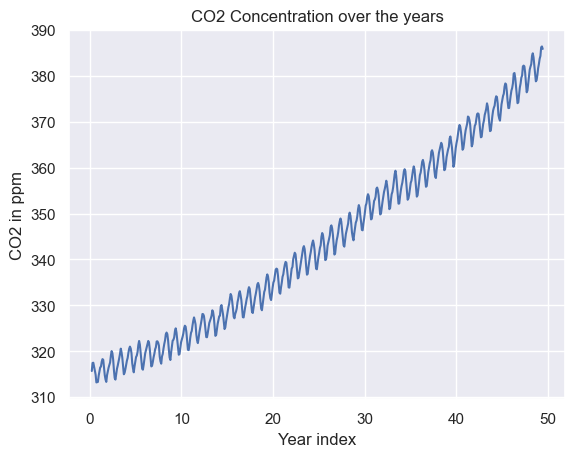

In [10]:
plt.plot(X_train, y_train)
plt.title("CO2 Concentration over the years")
plt.xlabel("Year index")
plt.ylabel("CO2 in ppm")
plt.show()

### Question 1

#### Fitting a Linear Model

In [11]:
lr_model = LinearRegression().fit(X_train, y_train)
y_hat = lr_model.predict(X_train)
y_hat

array([309.28471739, 309.40194165, 309.51916591, 309.75361444,
       309.8708387 , 309.98806296, 310.22251149, 310.33973575,
       310.45696001, 310.57418428, 310.69140854, 310.8086328 ,
       310.92585706, 311.04308133, 311.16030559, 311.27752985,
       311.39475411, 311.51197838, 311.62920264, 311.7464269 ,
       311.86365116, 311.98087542, 312.09809969, 312.21532395,
       312.33254821, 312.44977247, 312.56699674, 312.684221  ,
       312.80144526, 312.91866952, 313.03589379, 313.15311805,
       313.27034231, 313.38756657, 313.50479084, 313.6220151 ,
       313.73923936, 313.85646362, 313.97368789, 314.09091215,
       314.20813641, 314.32536067, 314.44258494, 314.5598092 ,
       314.67703346, 314.79425772, 314.91148199, 315.02870625,
       315.14593051, 315.26315477, 315.38037904, 315.4976033 ,
       315.61482756, 315.73205182, 315.84927609, 315.96650035,
       316.08372461, 316.20094887, 316.31817314, 316.4353974 ,
       316.55262166, 316.66984592, 316.78707019, 316.90

In [12]:
lr_model.coef_

array([1.40669115])

In [13]:
lr_model.intercept_

308.9916567323666

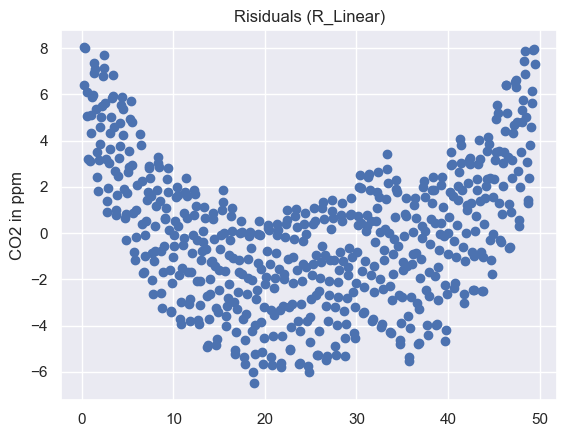

In [14]:
plt.scatter(X_train, y_train - y_hat)
plt.title("Risiduals (R_Linear)")
plt.ylabel("CO2 in ppm")
plt.show()

In [15]:
# Predict the test data and check the mean squared error and mean absolute error
y_test_hat = lr_model.predict(X_test)
rmse_linear = mean_squared_error(y_test, y_test_hat , squared = False)
mape_linear = mean_absolute_percentage_error(y_test, y_test_hat)
print(f"Root Mean squared error = {rmse_linear}")
print(f"Mean absolute percentage error = {mape_linear}")

Root Mean squared error = 10.641458521874688
Mean absolute percentage error = 0.02450454956443147


#### Fitting a Quadratic Model

In [16]:
np.hstack([X_train, X_train**2])

array([[2.08333333e-01, 4.34027778e-02],
       [2.91666667e-01, 8.50694444e-02],
       [3.75000000e-01, 1.40625000e-01],
       ...,
       [4.92916667e+01, 2.42966840e+03],
       [4.93750000e+01, 2.43789062e+03],
       [4.94583333e+01, 2.44612674e+03]])

In [17]:
X_quadratic_train = np.hstack([X_train, X_train**2])
X_quadratic_test = np.hstack([X_test, X_test**2])
lr_model = LinearRegression().fit(X_quadratic_train, y_train)
y_hat = lr_model.predict(X_quadratic_train)

In [18]:
lr_model.coef_

array([0.80209702, 0.0121175 ])

In [19]:
lr_model.intercept_

314.1005841870842

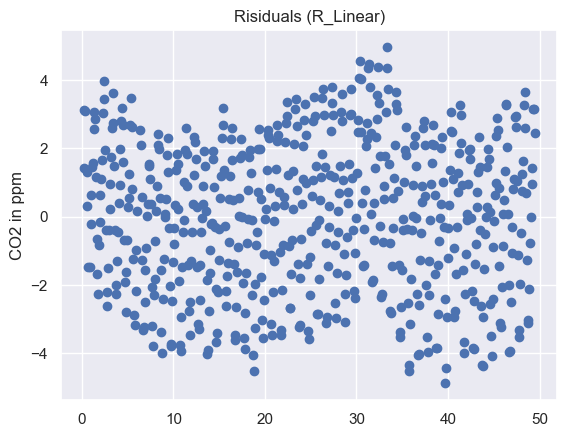

In [20]:
plt.scatter(X_train, y_train - y_hat)
plt.title("Risiduals (R_Linear)")
plt.ylabel("CO2 in ppm")
plt.show()

In [21]:
# Predict the test data and check the mean squared error and mean absolute error
y_test_hat = lr_model.predict(X_quadratic_test)
rmse_linear = mean_squared_error(y_test, y_test_hat , squared = False)
mape_linear = mean_absolute_percentage_error(y_test, y_test_hat)
print(f"Root Mean squared error = {rmse_linear}")
print(f"Mean absolute percentage error = {mape_linear}")

Root Mean squared error = 2.501332219489782
Mean absolute percentage error = 0.00532031912974085


#### Fitting a Cubic Model

In [22]:
X_cubic_train = np.hstack([X_train, X_train**2, X_train**3])
X_cubic_test = np.hstack([X_test, X_test**2, X_test**3])
lr_model = LinearRegression().fit(X_cubic_train, y_train)
y_hat = lr_model.predict(X_cubic_train)

In [23]:
lr_model.coef_

array([ 6.24895409e-01,  2.09575674e-02, -1.18323397e-04])

In [24]:
lr_model.intercept_

314.85852615628914

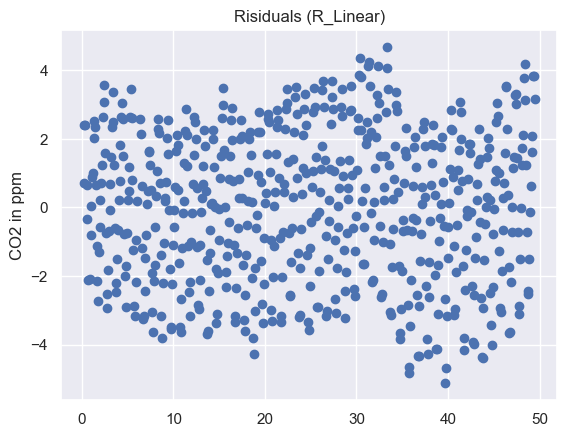

In [25]:
plt.scatter(X_train, y_train - y_hat)
plt.title("Risiduals (R_Linear)")
plt.ylabel("CO2 in ppm")
plt.show()

In [26]:
# Predict the test data and check the mean squared error and mean absolute error
y_test_hat = lr_model.predict(X_cubic_test)
rmse_linear = mean_squared_error(y_test, y_test_hat , squared = False)
mape_linear = mean_absolute_percentage_error(y_test, y_test_hat)
print(f"Root Mean squared error = {rmse_linear}")
print(f"Mean absolute percentage error = {mape_linear}")

Root Mean squared error = 4.149370712134834
Mean absolute percentage error = 0.008483502723897364


In [27]:
indices = np.array(train_dataset.index)
indices[np.array((indices%12 == 3))]

array([  3,  15,  27,  39,  51,  63,  87,  99, 111, 123, 135, 147, 159,
       171, 183, 195, 207, 219, 231, 243, 255, 267, 279, 291, 303, 315,
       327, 339, 351, 363, 375, 387, 399, 411, 423, 435, 447, 459, 471,
       483, 495, 507, 519, 531, 543, 555, 567, 579, 591], dtype=int64)

#### Fitting chosen model

In [28]:
# Calculate the residuals based on the best model then average them
per_month_co2_train = np.zeros((50,12))
# Fit the quadratic model
chosen_model = LinearRegression().fit(X_quadratic_train, y_train)
y_hat = chosen_model.predict(X_quadratic_train)
# predict the test data
y_test_hat = chosen_model.predict(X_quadratic_test)
# calculate the residuals
train_residual = y_train - y_hat
test_residual = y_test - y_test_hat
# Add the residual corresponding to each month in a collected numpy array
per_month_co2_train[np.array(train_dataset.index / 12).astype(int),np.array(indices%12)] = train_residual

In [29]:
per_month_co2_train

array([[ 0.00000000e+00,  0.00000000e+00,  1.43178633e+00,
         3.11444002e+00,  3.10692541e+00,  0.00000000e+00,
         1.32139129e+00,  3.23371776e-01, -1.46481603e+00,
         0.00000000e+00, -1.48169654e+00, -2.10389244e-01],
       [ 6.30749754e-01,  1.46172045e+00,  1.56252285e+00,
         2.56315696e+00,  3.06362276e+00,  2.85392027e+00,
         1.17404947e+00, -6.35989619e-01, -1.66619701e+00,
        -2.24657270e+00, -8.37116687e-01, -1.37828973e-01],
       [ 6.41290442e-01,  1.12024156e+00,  1.64902438e+00,
         3.02763890e+00,  3.96608512e+00,  3.44436304e+00,
         1.96247266e+00, -3.89586014e-01, -2.19181299e+00,
        -2.60420826e+00, -1.50677183e+00, -3.89503701e-01],
       [ 2.37596131e-01,  9.74527664e-01,  1.74129090e+00,
         2.60788583e+00,  3.63431247e+00,  2.75057081e+00,
         1.47666085e+00, -3.77417408e-01, -2.25166397e+00,
        -2.00607882e+00, -1.29066198e+00, -4.55413428e-01],
       [ 3.99666820e-01,  9.34578770e-01,  1.9893224

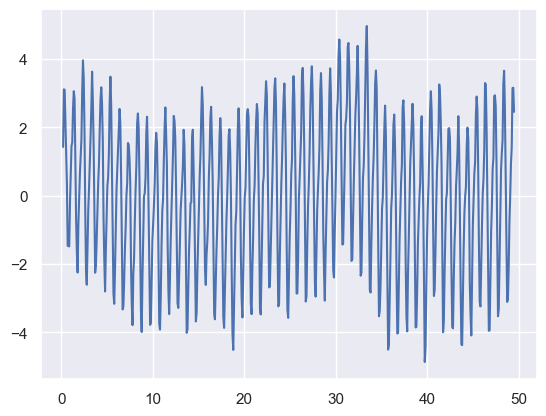

In [30]:
plt.plot(X_train, train_residual)

In [31]:
per_month_co2_train.shape

(50, 12)

In [32]:
periodic_signal = np.sum(per_month_co2_train, axis = 0) / per_month_co2_train.shape[0]
periodic_signal

array([-0.01266083,  0.62055033,  1.32845772,  2.5106209 ,  2.98289083,
        2.27014327,  0.76077146, -1.27518826, -3.06551291, -3.17713905,
       -2.03985701, -0.90307645])

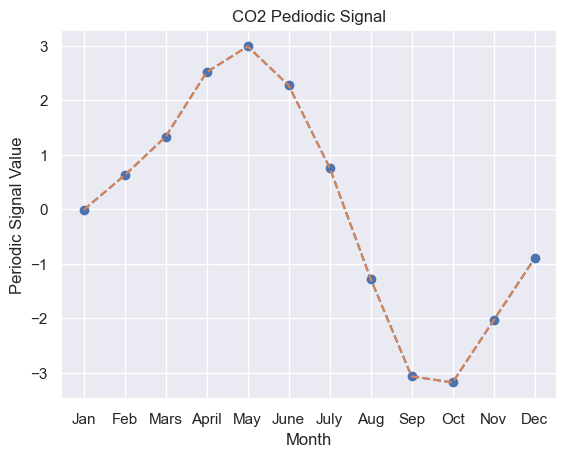

In [33]:
x = np.arange(0,12)
y = periodic_signal
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 11, 0.1)
ynew = f(xnew)
plt.plot(x, y, 'o', xnew, ynew, linestyle='dashed')
plt.xticks(x, labels = ['Jan','Feb','Mars','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.title('CO2 Pediodic Signal')
plt.xlabel('Month')
plt.ylabel('Periodic Signal Value')
plt.show()

In [34]:
periodic_signal

array([-0.01266083,  0.62055033,  1.32845772,  2.5106209 ,  2.98289083,
        2.27014327,  0.76077146, -1.27518826, -3.06551291, -3.17713905,
       -2.03985701, -0.90307645])

In [35]:
pd.options.mode.copy_on_write = True

In [36]:
for i in range(1,13):
    dataset_clean.loc[dataset_clean['Mn'] == i,'periodic'] = periodic_signal[i - 1]

In [37]:
dataset_clean

,Yr,Mn,Date Excel,Date,CO2 ppm,seasonally adjusted ppm,fit,seasonally adjusted fit ppm,CO2 filled ppm,seasonally adjusted filled ppm,periodic
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43,1.328458
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16,2.510621
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71,2.982891
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.21,315.86,315.19,0.760771
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19,-1.275188
...,...,...,...,...,...,...,...,...,...,...,...
736,2019,5,43600,2019.3699,414.83,411.42,414.53,411.12,414.83,411.42,2.982891
737,2019,6,43631,2019.4548,413.96,411.38,413.89,411.33,413.96,411.38,2.270143
738,2019,7,43661,2019.5370,411.85,411.03,412.32,411.54,411.85,411.03,0.760771
739,2019,8,43692,2019.6219,410.08,411.62,410.17,411.75,410.08,411.62,-1.275188


In [38]:
train_dataset.index

Index([  2,   3,   4,   6,   7,   8,  10,  11,  12,  13,
       ...
       584, 585, 586, 587, 588, 589, 590, 591, 592, 593],
      dtype='int64', length=587)

In [39]:
# repeat the periodic signal to add to the data
# get the number of 12 month repititions
periodic_signal_train = np.array(dataset_clean.loc[train_dataset.index]['periodic'])
# add the remainder of the 12 month repitition
periodic_signal_test = np.array(dataset_clean.loc[test_dataset.index]['periodic'])

In [40]:
periodic_signal_train

array([ 1.32845772,  2.5106209 ,  2.98289083,  0.76077146, -1.27518826,
       -3.06551291, -2.03985701, -0.90307645, -0.01266083,  0.62055033,
        1.32845772,  2.5106209 ,  2.98289083,  2.27014327,  0.76077146,
       -1.27518826, -3.06551291, -3.17713905, -2.03985701, -0.90307645,
       -0.01266083,  0.62055033,  1.32845772,  2.5106209 ,  2.98289083,
        2.27014327,  0.76077146, -1.27518826, -3.06551291, -3.17713905,
       -2.03985701, -0.90307645, -0.01266083,  0.62055033,  1.32845772,
        2.5106209 ,  2.98289083,  2.27014327,  0.76077146, -1.27518826,
       -3.06551291, -3.17713905, -2.03985701, -0.90307645, -0.01266083,
        0.62055033,  1.32845772,  2.5106209 ,  2.98289083,  2.27014327,
        0.76077146, -1.27518826, -3.06551291, -3.17713905, -2.03985701,
       -0.90307645, -0.01266083,  0.62055033,  1.32845772,  2.5106209 ,
        2.98289083,  2.27014327,  0.76077146, -1.27518826, -3.06551291,
       -3.17713905, -2.03985701, -0.90307645, -0.01266083,  2.98

In [41]:
CO2_train_fit = y_hat + periodic_signal_train
CO2_test_fit = y_test_hat + periodic_signal_test

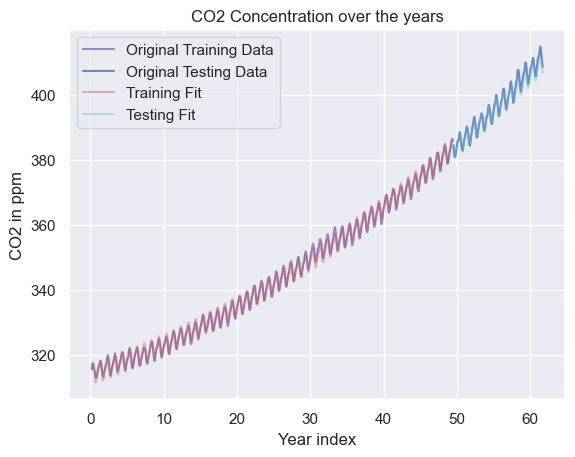

In [42]:
plt.plot(X_train, y_train, label = 'Original Training Data', alpha = 0.8, color = 'm')
plt.plot(X_test, y_test, label = 'Original Testing Data', alpha = 0.8, color = 'b')
plt.plot(X_train, CO2_train_fit, label = 'Training Fit', alpha = 0.4, color = 'r')
plt.plot(X_test, CO2_test_fit, label = 'Testing Fit', alpha = 0.4, color = 'c')
plt.title("CO2 Concentration over the years")
plt.xlabel("Year index")
plt.ylabel("CO2 in ppm")
plt.legend()
plt.show()

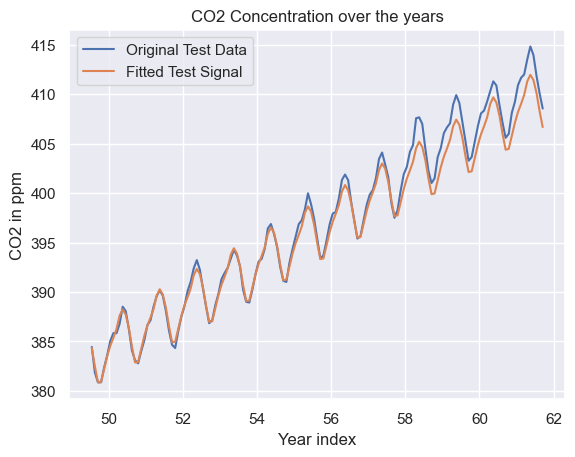

In [43]:
plt.plot(X_test, y_test, label = 'Original Test Data')
plt.plot(X_test, CO2_test_fit, label = 'Fitted Test Signal')
plt.title("CO2 Concentration over the years")
plt.xlabel("Year index")
plt.ylabel("CO2 in ppm")
plt.legend()
plt.show()

In [44]:
rmse_linear = mean_squared_error(y_test, CO2_test_fit , squared = False)
mape_linear = mean_absolute_percentage_error(y_test, CO2_test_fit)
print(f"Root Mean squared error = {rmse_linear}")
print(f"Mean absolute percentage error = {mape_linear}")

Root Mean squared error = 1.1497337376403927
Mean absolute percentage error = 0.002089252879828488


(3 points) What is the ratio of the range of values of F to the amplitude of Pi and the ratio of the amplitude of Pi to the range of the residual Ri (from removing both the trend and the periodic signal)? Is this decomposition of the variation of the CO2 concentration meaningful? (Maximum 200 words.)

In [301]:
# get the ampliture of the periodic signal
periodic_amplitude = np.max(np.abs(periodic_signal))
periodic_range = np.max(periodic_signal) - np.min(periodic_signal)
periodic_amplitude

3.1771390482102104

In [46]:
trend_range = np.max(y_hat) - np.min(y_hat)
trend_range

69.1436923453914

In [302]:
# Get the ratio between range of trend and amplitude of periodic signal
trend_range / periodic_amplitude

21.7628788970827

In [48]:
np.max(y_train - CO2_train_fit)

2.0974064941521533

In [49]:
np.min(y_train - CO2_train_fit)

-1.801295846974881

In [50]:
# get ratio between amplitude and residual
residual_after_detrend_deseasonality = y_train - CO2_train_fit
residual_range_after_fit = np.max(residual_after_detrend_deseasonality) - np.min(residual_after_detrend_deseasonality)
periodic_amplitude / residual_range_after_fit

0.8149221895436535

In [51]:
periodic_amplitude

3.1771390482102104

In [52]:
residual_range_after_fit

3.8987023411270343

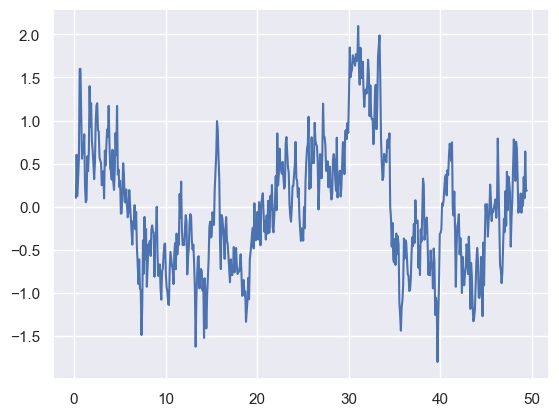

In [53]:
plt.plot(X_train,residual_after_detrend_deseasonality)

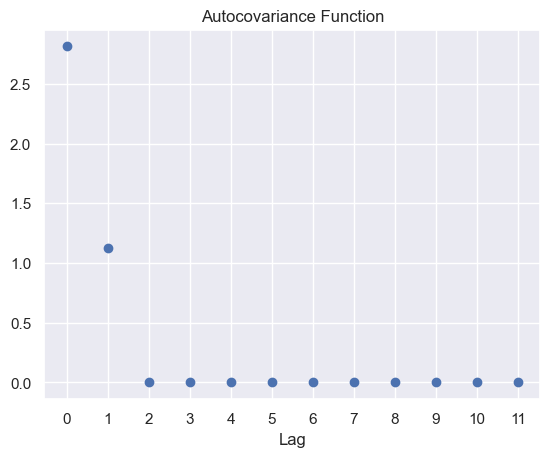

In [54]:
theta = 0.5
sigma = 1.5
gamma_0 = sigma**2 * (1+theta**2)
gamma_1 = theta * sigma**2
x = np.arange(0,12)
y = np.zeros(12)
y[0] = gamma_0
y[1] = gamma_1
plt.scatter(x,y)
plt.xticks(x)
plt.title("Autocovariance Function")
plt.xlabel("Lag")
plt.show()

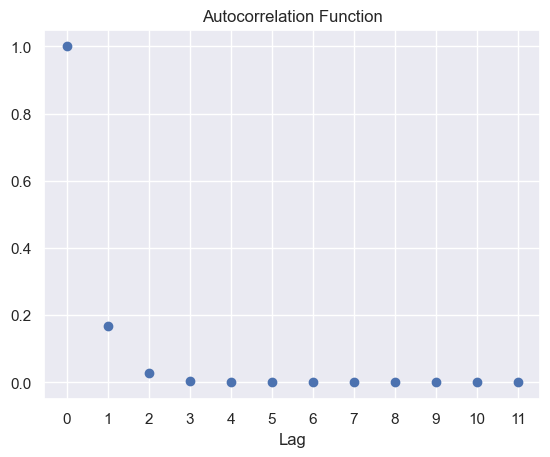

In [55]:
phi = 0.5
sigma = 1.5
gamma_0 = sigma**2 / (1-phi**2)
x = np.arange(0,12)
y = np.zeros(12)
y[0] = gamma_0 / gamma_0
for i in range(1, x.shape[0]):
    y[i] = phi * y[i-1] / gamma_0
plt.scatter(x,y)
plt.xticks(x)
plt.title("Autocorrelation Function")
plt.xlabel("Lag")
plt.show()

### Question 2

#### Detrend CPI

In [283]:
cpi_data_path = "D:/Artificial Intelligence/MITMicroMasters/DataAnalysis/Module4/Homework/CPI.csv"
cpi_dataset = pd.read_csv(cpi_data_path, usecols = ["date","CPI"])
cpi_dataset["date"] = pd.to_datetime(cpi_dataset["date"])
cpi_dataset.set_index("date", inplace = True)
train_dataset = cpi_dataset[:'2013-08']
test_dataset = cpi_dataset['2013-09':]
train_dataset

,CPI
date,
2008-07-24,100.0000
2008-07-25,100.0000
2008-07-26,100.0000
2008-07-27,100.0000
2008-07-28,100.0000
...,...
2013-08-27,106.7551
2013-08-28,106.7551
2013-08-29,106.7551


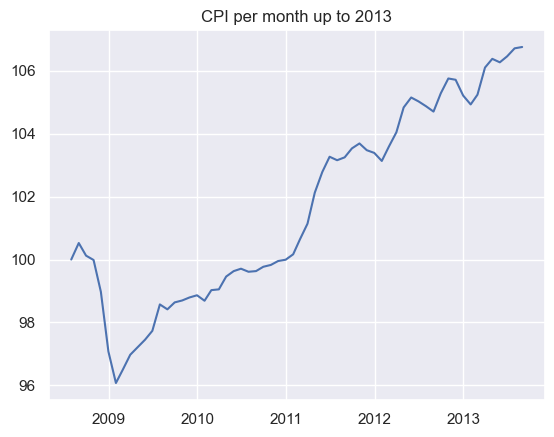

In [57]:
month_year = np.array(train_dataset[train_dataset.index.is_month_end].index)
first_months_cpi = np.array(train_dataset[train_dataset.index.is_month_end]['CPI'])
plt.plot(month_year, first_months_cpi)
plt.title("CPI per month up to 2013")
plt.show()

In [58]:
X_train = np.arange(0,len(train_dataset[train_dataset.index.is_month_end])).reshape(-1, 1)
y_train = np.array(train_dataset[train_dataset.index.is_month_end]['CPI'])
X_test = np.arange(len(train_dataset[train_dataset.index.is_month_end]), 
                  len(train_dataset[train_dataset.index.is_month_end]) + 
                  len(test_dataset[test_dataset.index.is_month_end])).reshape(-1, 1)
y_test = test_dataset[test_dataset.index.is_month_end]["CPI"]
cpi_lr_model_trend = LinearRegression().fit(X_train, y_train)
y_hat_linear = cpi_lr_model_trend.predict(X_train)
y_hat_linear

array([ 96.72932633,  96.89036981,  97.0514133 ,  97.21245678,
        97.37350026,  97.53454375,  97.69558723,  97.85663071,
        98.0176742 ,  98.17871768,  98.33976117,  98.50080465,
        98.66184813,  98.82289162,  98.9839351 ,  99.14497858,
        99.30602207,  99.46706555,  99.62810903,  99.78915252,
        99.950196  , 100.11123949, 100.27228297, 100.43332645,
       100.59436994, 100.75541342, 100.9164569 , 101.07750039,
       101.23854387, 101.39958736, 101.56063084, 101.72167432,
       101.88271781, 102.04376129, 102.20480477, 102.36584826,
       102.52689174, 102.68793522, 102.84897871, 103.01002219,
       103.17106568, 103.33210916, 103.49315264, 103.65419613,
       103.81523961, 103.97628309, 104.13732658, 104.29837006,
       104.45941354, 104.62045703, 104.78150051, 104.942544  ,
       105.10358748, 105.26463096, 105.42567445, 105.58671793,
       105.74776141, 105.9088049 , 106.06984838, 106.23089187,
       106.39193535, 106.55297883])

In [59]:
cpi_lr_model_trend.coef_

array([0.16104348])

In [60]:
cpi_lr_model_trend.intercept_

96.72932632872502

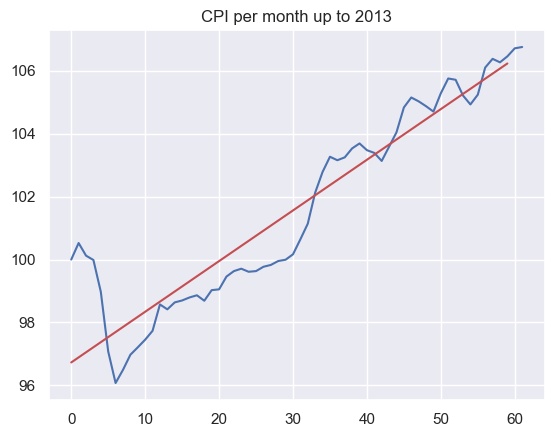

In [61]:
x_plot = np.arange(0, 60, 1)
y_plot = cpi_lr_model_trend.coef_*x_plot + cpi_lr_model_trend.intercept_
month_year = np.array(train_dataset[train_dataset.index.is_month_end].index)
first_months_cpi = np.array(train_dataset[train_dataset.index.is_month_end]['CPI'])
plt.plot(X_train, y_train)
plt.plot(x_plot,y_plot, color = 'r')
plt.title("CPI per month up to 2013")
plt.show()

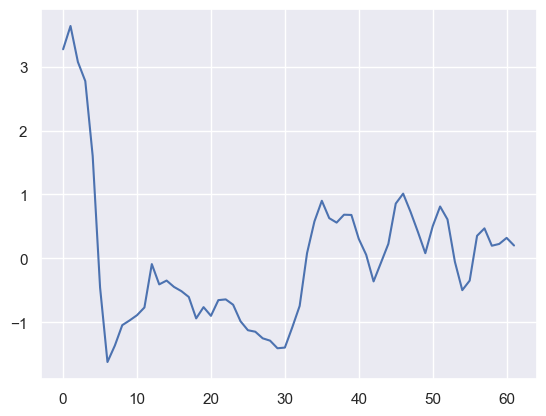

In [62]:
linear_residuals = y_train - y_hat_linear
plt.plot(X_train, linear_residuals)

In [63]:
np.max(np.abs(linear_residuals))

3.634730187605456

In [64]:
train_dataset

,CPI
date,
2008-07-24,100.0000
2008-07-25,100.0000
2008-07-26,100.0000
2008-07-27,100.0000
2008-07-28,100.0000
...,...
2013-08-27,106.7551
2013-08-28,106.7551
2013-08-29,106.7551


In [65]:
np.max(np.abs(train_dataset['CPI'] - 
              cpi_lr_model_trend.predict(np.arange(0,len(train_dataset)).reshape(-1, 1))))

290.1592798886959

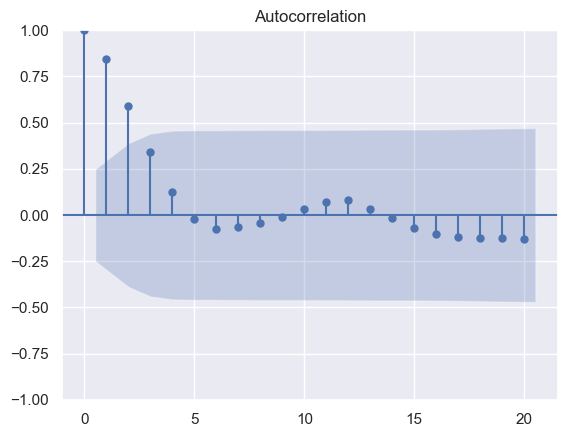

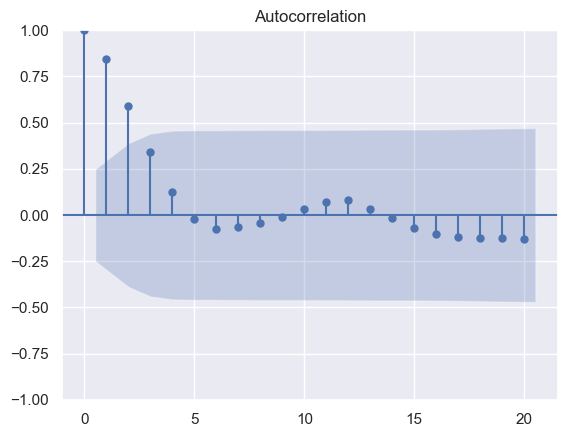

In [66]:
plot_acf(linear_residuals, lags=20)

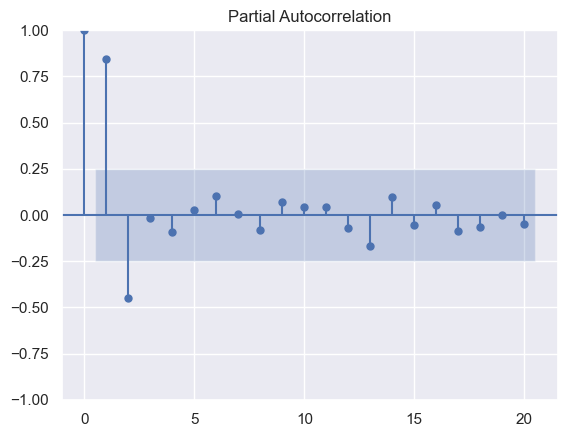

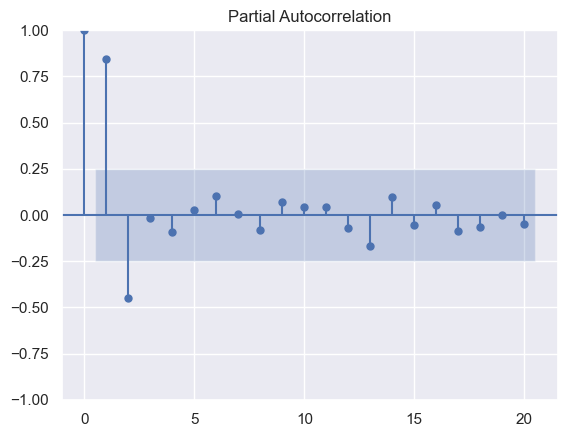

In [67]:
plot_pacf(linear_residuals, lags=20)

In [68]:
len(y_test)

74

In [69]:
y_hat_test_linear = cpi_lr_model_trend.predict(X_test)
rmse_linear = mean_squared_error(y_test[:-1], y_hat_test_linear[:-1] , squared = False)
rmse_linear

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


1.8082564165046215

#### AR Model: Find the Parameters


In [70]:
ar_model = AutoReg(linear_residuals, lags = 2).fit()
ar_model

In [71]:
ar_model.params

array([-0.04310485,  1.32366553, -0.5307974 ])

In [72]:
ar_train_predictions = ar_model.predict()
ar_train_predictions

array([            nan,             nan,  3.03199713e+00,  2.09440220e+00,
        1.99650316e+00,  6.05400948e-01, -1.49540503e+00, -1.94589301e+00,
       -9.87133464e-01, -7.01630282e-01, -7.71867547e-01, -7.03512521e-01,
       -5.87369052e-01,  2.46758303e-01, -5.33431897e-01, -2.85968581e-01,
       -4.49152881e-01, -4.83761681e-01, -5.69368070e-01, -9.64625767e-01,
       -5.53462205e-01, -8.27502424e-01, -4.29901033e-01, -5.44820592e-01,
       -6.61988637e-01, -9.59521897e-01, -1.00768509e+00, -9.64455886e-01,
       -1.08833307e+00, -1.08228194e+00, -1.22030471e+00, -1.14279405e+00,
       -7.30192927e-01, -4.54187410e-01,  4.60090539e-01,  6.79374350e-01,
        8.42760385e-01,  3.11983110e-01,  3.63986086e-01,  5.64632534e-01,
        4.93908490e-01, -3.51163379e-04, -1.30055846e-01, -5.48938189e-01,
        5.94083188e-02,  2.94570061e-01,  9.70747622e-01,  8.42830145e-01,
        3.83700037e-01,  1.17669699e-01, -1.54488186e-01,  5.79838747e-01,
        7.64714922e-01,  

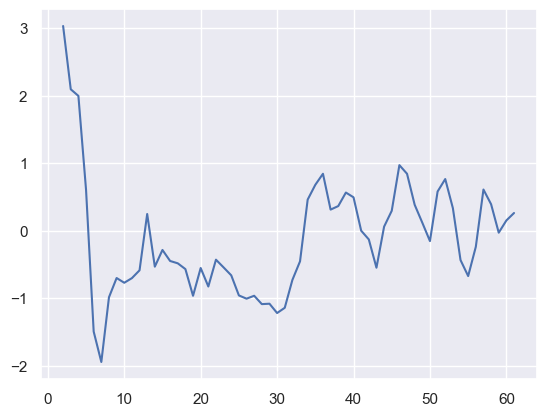

In [73]:
plt.plot(X_train[2:], ar_train_predictions[2:])

#### Mean Squared Error

In [74]:
# Get the residuals after linear fit for test data
linear_test_residuals = y_test - y_hat_test_linear

In [75]:
linear_residuals[len(X_train) - 2 : ]

array([0.32106465, 0.20212117])

In [76]:
coeff_0 = ar_model.params[0]
coeffs = ar_model.params[1:]
n = len(ar_model.params) - 1
past = linear_residuals[len(X_train) - n : ]
predictions = []
for i in range(len(y_test)):
    lags = [past[i] for i in range(len(past) - n,len(past))]
    pred = coeff_0
    for d in range(0, n):
        pred += coeffs[d] * lags[n - d - 1]
    predictions.append(pred)
    past = np.append(past,pred)

In [77]:
linear_trend = cpi_lr_model_trend.predict(X_test)
ar_predictions = ar_model.predict(start = 61, end = 61 + len(test_dataset[test_dataset.index.is_month_end]) - 1)
y_hat = linear_trend + ar_predictions
y_hat

array([106.97561667, 106.92908149, 106.95721776, 107.02095054,
       107.12373401, 107.25931299, 107.41757424, 107.58845148,
       107.76398837, 107.93899654, 108.11083154, 108.27874696,
       108.44315848, 108.60501251, 108.76534114, 108.92500817,
       109.08460912, 109.2444738 , 109.40472262, 109.56533996,
       109.72624116, 109.88732252, 110.04849165, 110.20968135,
       110.37085168, 110.53198545, 110.69308112, 110.85414575,
       111.01518953, 111.17622218, 111.33725117, 111.49828121,
       111.6593146 , 111.82035185, 111.98139245, 112.14243542,
       112.30347976, 112.46452464, 112.62556953, 112.78661412,
       112.94765833, 113.10870219, 113.26974578, 113.43078921,
       113.59183256, 113.7528759 , 113.91391926, 114.07496266,
       114.2360061 , 114.39704957, 114.55809305, 114.71913655,
       114.88018005, 115.04122354, 115.20226704, 115.36331053,
       115.52435401, 115.6853975 , 115.84644098, 116.00748446,
       116.16852794, 116.32957143, 116.49061491, 116.65

In [78]:
y_hat = linear_trend + predictions
rmse_linear_ar = mean_squared_error(y_test[:-1], y_hat[:-1] , squared = False)
rmse_linear_ar

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


1.63429368614464

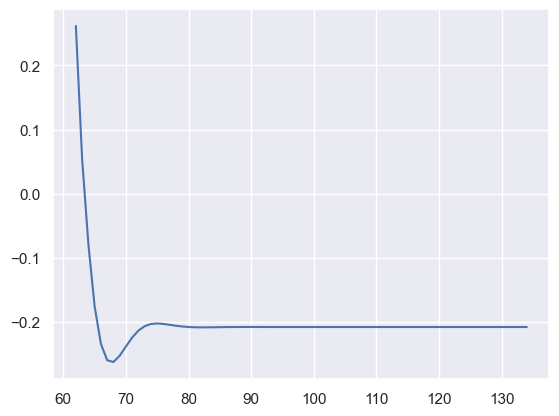

In [79]:
plt.plot(X_test[:-1], ar_predictions[:-1])

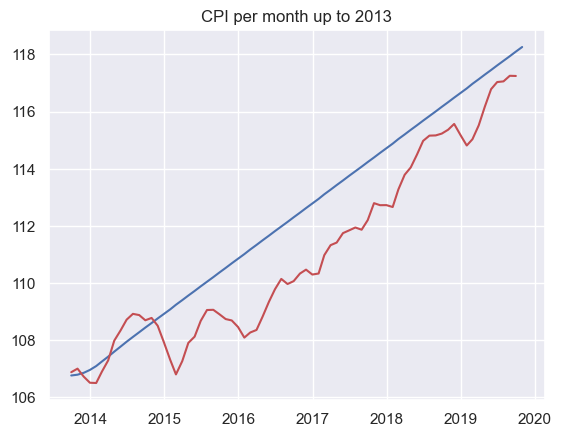

In [80]:
month_year = np.array(test_dataset[test_dataset.index.is_month_end].index)
first_months_cpi = np.array(test_dataset[test_dataset.index.is_month_end]['CPI'])
plt.plot(month_year, y_hat)
plt.plot(month_year,first_months_cpi, color = 'r')
plt.title("CPI per month up to 2013")
plt.show()

In [81]:
y_test = np.array(test_dataset[test_dataset.index.is_month_end]["CPI"].values)[:-1]
y_hat = y_hat[:-1]
rmse_linear = mean_squared_error(y_test, y_hat , squared = False)
rmse_linear

1.63429368614464

In [82]:
rmse_linear

1.63429368614464

### Question 3

In [521]:
cpi_data_path = "D:/Artificial Intelligence/MITMicroMasters/DataAnalysis/Module4/Homework/CPI.csv"
cpi_dataset = pd.read_csv(cpi_data_path, usecols = ["date","CPI"])
cpi_dataset["date"] = pd.to_datetime(cpi_dataset["date"])
cpi_dataset.set_index("date", inplace = True)
train_dataset = cpi_dataset[:'2013-08']
test_dataset = cpi_dataset['2013-09':]

X_train = np.arange(0, len(train_dataset[train_dataset.index.is_month_start])).reshape(-1,1)
y_train = train_dataset[train_dataset.index.is_month_start].round(decimals = 5)
y_train["inflation_rate"] = 0.0
y_train["inflation_rate"] = np.append([0],np.array((y_train["CPI"][1:].values - y_train["CPI"][:-1].values) 
                                         / y_train["CPI"][:-1].values, dtype='float32') * 100)

X_test = np.arange(len(train_dataset[train_dataset.index.is_month_start])
                   , len(train_dataset[train_dataset.index.is_month_start]) + len(test_dataset[test_dataset.index.is_month_start])).reshape(-1,1)
y_test = test_dataset[test_dataset.index.is_month_start].round(decimals = 5)
y_test["inflation_rate"] = 0.0
bridge_value = ((y_test.loc["2013-09-01","CPI"] - y_train.loc["2013-08-01","CPI"]) / y_train.loc["2013-08-01","CPI"]) * 100.0
y_test["inflation_rate"] = np.append( bridge_value ,
                                      np.array((y_test["CPI"][1:].values - y_test["CPI"][:-1].values) 
                                         / y_test["CPI"][:-1].values, dtype='float32') * 100)
y_test

,CPI,inflation_rate
date,,
2013-09-01,106.8835,0.120275
2013-10-01,107.0078,0.116295
2013-11-01,106.7322,-0.257551
2013-12-01,106.5142,-0.204250
2014-01-01,106.5051,-0.008543
...,...,...
2019-07-01,117.0592,0.019908
2019-08-01,117.2548,0.167095
2019-09-01,117.2488,-0.005117


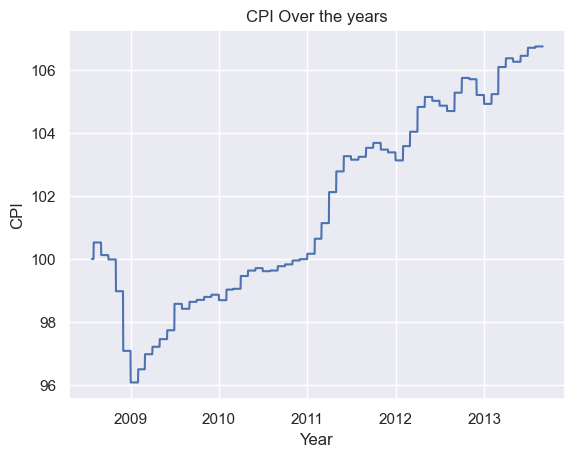

In [522]:
plt.plot(train_dataset.index, train_dataset["CPI"].values)
plt.title("CPI Over the years")
plt.xlabel("Year")
plt.ylabel("CPI")
plt.show()

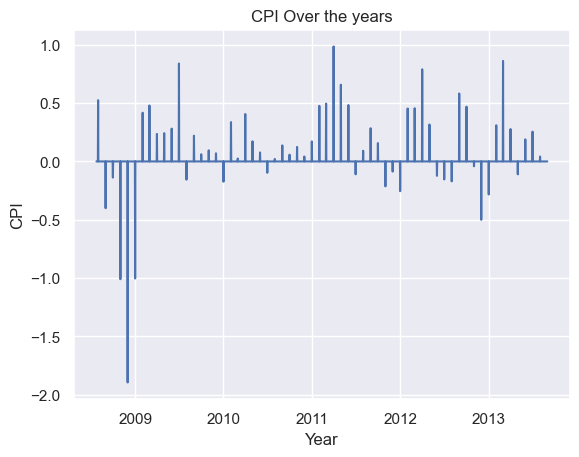

In [523]:
CPI_diff = train_dataset["CPI"].values[1:] - train_dataset["CPI"].values[:-1]
plt.plot(train_dataset.index[1:], CPI_diff)
plt.title("CPI Over the years")
plt.xlabel("Year")
plt.ylabel("CPI")
plt.show()

In [524]:
y_train.loc["2013-02-01"]

CPI               105.239600
inflation_rate      0.295723
Name: 2013-02-01 00:00:00, dtype: float64

In [525]:
y_train["inflation_rate_log"] = 0.0
y_train["inflation_rate_log"] = np.append([0],
                                              (np.log(y_train["CPI"][1:].values) - np.log(y_train["CPI"][:-1].values)) * 100.0)
y_train

,CPI,inflation_rate,inflation_rate_log
date,,,
2008-08-01,100.52510,0.000000,0.000000
2008-09-01,100.12380,-0.399204,-0.400003
2008-10-01,99.98538,-0.138249,-0.138344
2008-11-01,98.97539,-1.010138,-1.015274
2008-12-01,97.07973,-1.915284,-1.933863
...,...,...,...
2013-04-01,106.37890,0.261448,0.261107
2013-05-01,106.26830,-0.103968,-0.104022
2013-06-01,106.45750,0.178040,0.177882


In [526]:
y_train.loc["2013-02-01"]

CPI                   105.239600
inflation_rate          0.295723
inflation_rate_log      0.295287
Name: 2013-02-01 00:00:00, dtype: float64

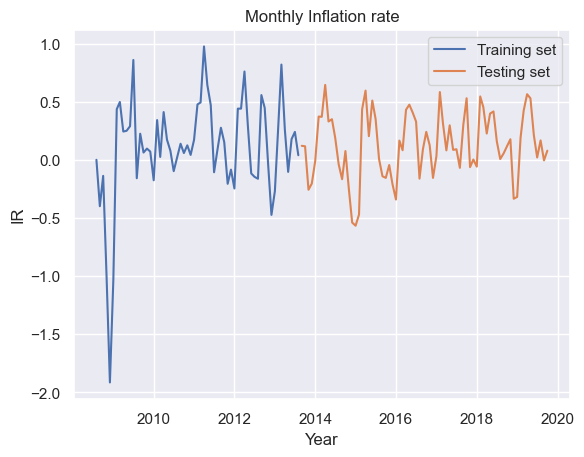

In [527]:
# Plot the monthly inflation rate
plt.plot(y_train.index, y_train['inflation_rate'].values, label = "Training set")
plt.plot(y_test.index, y_test['inflation_rate'].values, label = "Testing set")
plt.title("Monthly Inflation rate")
plt.xlabel("Year")
plt.ylabel("IR")
plt.legend()
plt.show()

In [528]:
cpi_lr_model = LinearRegression().fit(X_train, y_train['inflation_rate'].values)
cpi_hat = cpi_lr_model.predict(X_train)
cpi_hat

array([-0.09016187, -0.08383511, -0.07750836, -0.07118161, -0.06485485,
       -0.0585281 , -0.05220135, -0.04587459, -0.03954784, -0.03322108,
       -0.02689433, -0.02056758, -0.01424082, -0.00791407, -0.00158732,
        0.00473944,  0.01106619,  0.01739295,  0.0237197 ,  0.03004645,
        0.03637321,  0.04269996,  0.04902671,  0.05535347,  0.06168022,
        0.06800697,  0.07433373,  0.08066048,  0.08698724,  0.09331399,
        0.09964074,  0.1059675 ,  0.11229425,  0.118621  ,  0.12494776,
        0.13127451,  0.13760127,  0.14392802,  0.15025477,  0.15658153,
        0.16290828,  0.16923503,  0.17556179,  0.18188854,  0.1882153 ,
        0.19454205,  0.2008688 ,  0.20719556,  0.21352231,  0.21984906,
        0.22617582,  0.23250257,  0.23882932,  0.24515608,  0.25148283,
        0.25780959,  0.26413634,  0.27046309,  0.27678985,  0.2831166 ,
        0.28944335])

In [529]:
cpi_test_hat = cpi_lr_model.predict(X_test)
cpi_test_hat

array([0.29577011, 0.30209686, 0.30842362, 0.31475037, 0.32107712,
       0.32740388, 0.33373063, 0.34005738, 0.34638414, 0.35271089,
       0.35903765, 0.3653644 , 0.37169115, 0.37801791, 0.38434466,
       0.39067141, 0.39699817, 0.40332492, 0.40965167, 0.41597843,
       0.42230518, 0.42863194, 0.43495869, 0.44128544, 0.4476122 ,
       0.45393895, 0.4602657 , 0.46659246, 0.47291921, 0.47924597,
       0.48557272, 0.49189947, 0.49822623, 0.50455298, 0.51087973,
       0.51720649, 0.52353324, 0.52986   , 0.53618675, 0.5425135 ,
       0.54884026, 0.55516701, 0.56149376, 0.56782052, 0.57414727,
       0.58047403, 0.58680078, 0.59312753, 0.59945429, 0.60578104,
       0.61210779, 0.61843455, 0.6247613 , 0.63108805, 0.63741481,
       0.64374156, 0.65006832, 0.65639507, 0.66272182, 0.66904858,
       0.67537533, 0.68170208, 0.68802884, 0.69435559, 0.70068235,
       0.7070091 , 0.71333585, 0.71966261, 0.72598936, 0.73231611,
       0.73864287, 0.74496962, 0.75129638, 0.75762313, 0.76394

In [530]:
cpi_intercept = cpi_lr_model.intercept_
cpi_slope = cpi_lr_model.coef_

In [531]:
cpi_func = cpi_intercept + cpi_slope * X_train

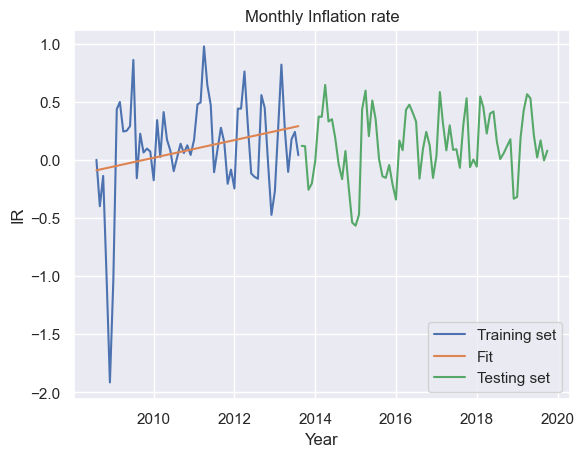

In [532]:
plt.plot(y_train.index, y_train['inflation_rate'].values, label = "Training set")
plt.plot(y_train.index, cpi_func, label = "Fit")
plt.plot(y_test.index, y_test['inflation_rate'].values, label = "Testing set")
plt.title("Monthly Inflation rate")
plt.xlabel("Year")
plt.ylabel("IR")
plt.legend()
plt.show()

In [533]:
len(cpi_hat)

61

In [534]:
y_train["inflation_rate"] - cpi_hat

date
2008-08-01    0.090162
2008-09-01   -0.315369
2008-10-01   -0.060740
2008-11-01   -0.938956
2008-12-01   -1.850429
                ...   
2013-04-01   -0.002689
2013-05-01   -0.374431
2013-06-01   -0.098750
2013-07-01   -0.043115
2013-08-01   -0.249992
Name: inflation_rate, Length: 61, dtype: float64

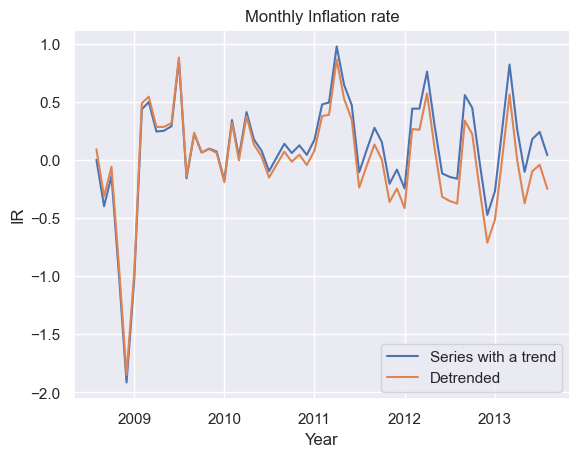

In [535]:
plt.plot(y_train.index, y_train["inflation_rate"] , label = "Series with a trend")
plt.plot(y_train.index, y_train["inflation_rate"] - cpi_hat, label = "Detrended")
plt.title("Monthly Inflation rate")
plt.xlabel("Year")
plt.ylabel("IR")
plt.legend()
plt.show()

In [536]:
cpi_linear_residuals = y_train["inflation_rate"] - cpi_hat

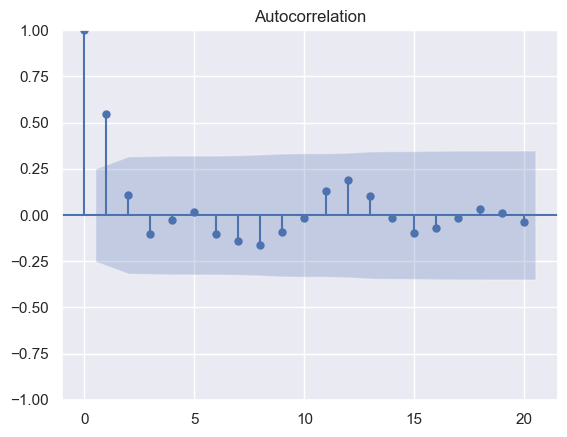

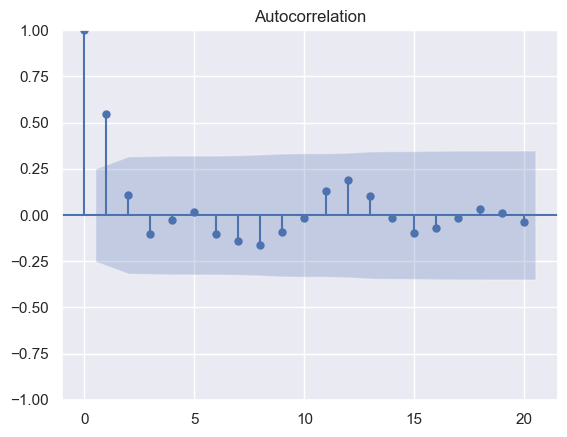

In [537]:
plot_acf(y_train["inflation_rate"], lags=20)

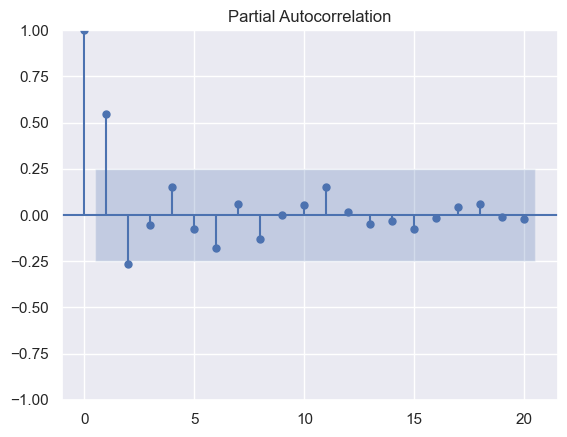

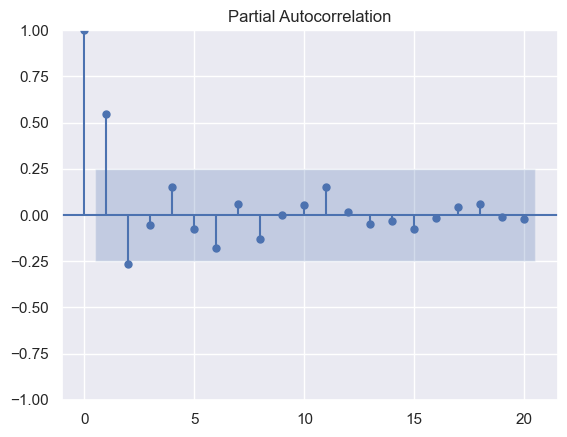

In [538]:
plot_pacf(y_train["inflation_rate"], lags=20)

In [539]:
# We will have AR(2)
# but lets check the different rmse for different lags
lags_list = np.arange(1, 30)
RMSE_list = list()
AIC_list = list()
BIC_list = list()
for lag in lags_list:
    cpi_ar_model = AutoReg(y_train["inflation_rate"].values, lags = lag).fit() 
    preds = cpi_ar_model.predict()
    rmse = mean_squared_error(y_train["inflation_rate"].values[lag:], preds[lag:] , squared = False)
    RMSE_list.append(rmse)
    AIC_list.append(cpi_ar_model.aic)
    BIC_list.append(cpi_ar_model.bic)
    print(cpi_ar_model.summary())
RMSE_list

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   61
Model:                     AutoReg(1)   Log Likelihood                 -27.184
Method:               Conditional MLE   S.D. of innovations              0.381
Date:                Wed, 07 Aug 2024   AIC                             60.368
Time:                        08:30:42   BIC                             66.651
Sample:                             1   HQIC                            62.826
                                   61                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0465      0.050      0.923      0.356      -0.052       0.145
y.L1           0.5448      0.108      5.034      0.000       0.333       0.757
                                    Roots           

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   61
Model:                    AutoReg(16)   Log Likelihood                   5.932
Method:               Conditional MLE   S.D. of innovations              0.212
Date:                Wed, 07 Aug 2024   AIC                             24.135
Time:                        08:30:43   BIC                             56.655
Sample:                            16   HQIC                            36.258
                                   61                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2291      0.096      2.389      0.017       0.041       0.417
y.L1           0.4435      0.161      2.756      0.006       0.128       0.759
y.L2          -0.0634      0.172     -0.369      0.7

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   61
Model:                    AutoReg(27)   Log Likelihood                  17.672
Method:               Conditional MLE   S.D. of innovations              0.144
Date:                Wed, 07 Aug 2024   AIC                             22.657
Time:                        08:30:43   BIC                             66.921
Sample:                            27   HQIC                            37.752
                                   61                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4315      0.206      2.093      0.036       0.027       0.836
y.L1           0.3094      0.176      1.757      0.079      -0.036       0.655
y.L2           0.0076      0.174      0.044      0.9

[0.3806518627149827,
 0.3657431609500774,
 0.36822906274529604,
 0.3374794256127857,
 0.2705708555654319,
 0.25359767603024713,
 0.2507989271825841,
 0.24174062741613805,
 0.23814446920388124,
 0.23506951736154658,
 0.22048948599062518,
 0.22087638316095143,
 0.2105865063548597,
 0.21161675907400426,
 0.21017343657162466,
 0.2120846144023075,
 0.21011404323234284,
 0.20440243328968621,
 0.20583635133654773,
 0.17971156037014954,
 0.18059810966840736,
 0.18250694914851712,
 0.17913636057079893,
 0.1788174276146795,
 0.1664496465212653,
 0.1477775564909521,
 0.14389151288067098,
 0.12795266329141483,
 0.10373231433626727]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


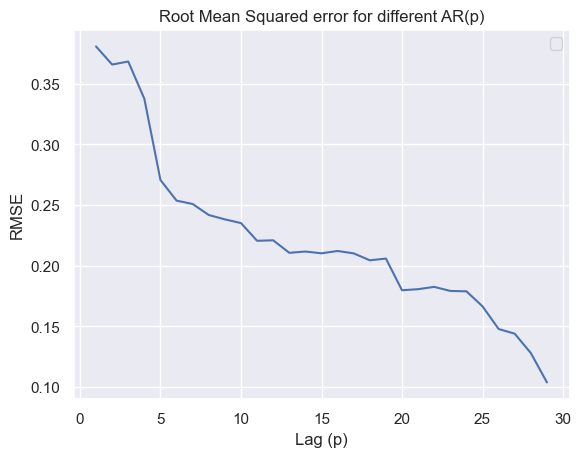

In [540]:
plt.plot(lags_list, RMSE_list)
plt.title("Root Mean Squared error for different AR(p)")
plt.xlabel("Lag (p)")
plt.ylabel("RMSE")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


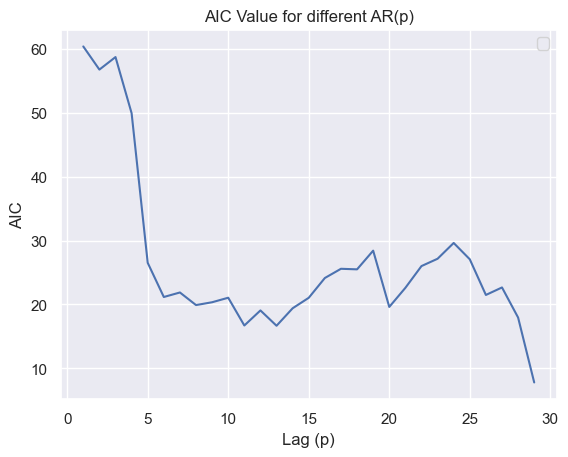

In [541]:
plt.plot(lags_list, AIC_list)
plt.title("AIC Value for different AR(p)")
plt.xlabel("Lag (p)")
plt.ylabel("AIC")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


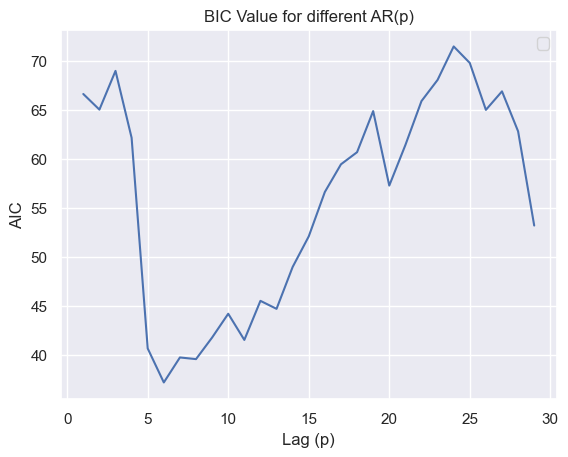

In [542]:
plt.plot(lags_list, BIC_list)
plt.title("BIC Value for different AR(p)")
plt.xlabel("Lag (p)")
plt.ylabel("AIC")
plt.legend()
plt.show()

In [543]:
BIC_list.index(min(BIC_list))

5

In [544]:
BIC_list.index(min(BIC_list)) == AIC_list.index(min(AIC_list))

False

In [545]:
cpi_ar_chosen_model = cpi_ar_model = AutoReg(cpi_linear_residuals, lags = 2).fit() 
ar_preds = cpi_ar_chosen_model.predict()
cpi_ar_chosen_model.summary()

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:         inflation_rate   No. Observations:                   61
Model:                     AutoReg(2)   Log Likelihood                 -23.764
Method:               Conditional MLE   S.D. of innovations              0.362
Date:                Wed, 07 Aug 2024   AIC                             55.529
Time:                        08:30:46   BIC                             63.839
Sample:                    10-01-2008   HQIC                            58.773
                         - 08-01-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0034      0.047      0.073      0.942      -0.089       0.096
inflation_rate.L1     0.6637      0.124      5.343      0.000       0.420       0.907
inflation_rate.L2    -0.2831      0.124     -2.280      0.023      -0.527      -0.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1720           -1.4691j            1.8793           -0.1428
AR.2            1.1720           +1.4691j            1.8793            0.1428
-----------------------------------------------------------------------------
"""

In [546]:
X_test[0]

array([61])

In [547]:
ar_test_predictions = cpi_ar_chosen_model.predict(start = 61, end = len(X_test) + 61 - 1)

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [548]:
print(ar_test_predictions[:30])

2013-09-01   -0.150278
2013-10-01   -0.025528
2013-11-01    0.029032
2013-12-01    0.029921
2014-01-01    0.015063
2014-02-01    0.004951
2014-03-01    0.002447
2014-04-01    0.003648
2014-05-01    0.005154
2014-06-01    0.005813
2014-07-01    0.005825
2014-08-01    0.005645
2014-09-01    0.005523
2014-10-01    0.005493
2014-11-01    0.005507
2014-12-01    0.005526
2015-01-01    0.005534
2015-02-01    0.005534
2015-03-01    0.005532
2015-04-01    0.005530
2015-05-01    0.005530
2015-06-01    0.005530
2015-07-01    0.005530
2015-08-01    0.005530
2015-09-01    0.005530
2015-10-01    0.005530
2015-11-01    0.005530
2015-12-01    0.005530
2016-01-01    0.005530
2016-02-01    0.005530
Freq: MS, dtype: float64


In [549]:
linear_test_residuals = y_test['inflation_rate'].values - cpi_test_hat
linear_test_residuals = linear_test_residuals[:-1]
linear_test_residuals

array([-0.17549482, -0.18580202, -0.56597493, -0.51899989, -0.32962059,
        0.04459709,  0.03604973,  0.30395185, -0.01671666, -0.00345166,
       -0.17278279, -0.40438225, -0.53875273, -0.30276499, -0.63558131,
       -0.93062864, -0.96397805, -0.87392058,  0.02459442,  0.17925078,
       -0.21898402,  0.0810441 , -0.08465972, -0.43459184, -0.58926876,
       -0.60956905, -0.50523428, -0.67764424, -0.81469067, -0.31392628,
       -0.4032802 , -0.06130333, -0.02408353, -0.09995832, -0.18242375,
       -0.67908108, -0.43168893, -0.28946688, -0.41147486, -0.69802816,
       -0.51611136,  0.02759726, -0.24693031, -0.48652942, -0.27760844,
       -0.4950148 , -0.49604994, -0.66208923, -0.30008629, -0.07629856,
       -0.67522948, -0.61603938, -0.68357465, -0.08627842, -0.1839247 ,
       -0.41762467, -0.2526041 , -0.24050458, -0.50329934, -0.66236227,
       -0.61980458, -0.56550223, -0.51128761, -1.02930324, -1.02008656,
       -0.51635506, -0.29067896, -0.15551984, -0.19643022, -0.51

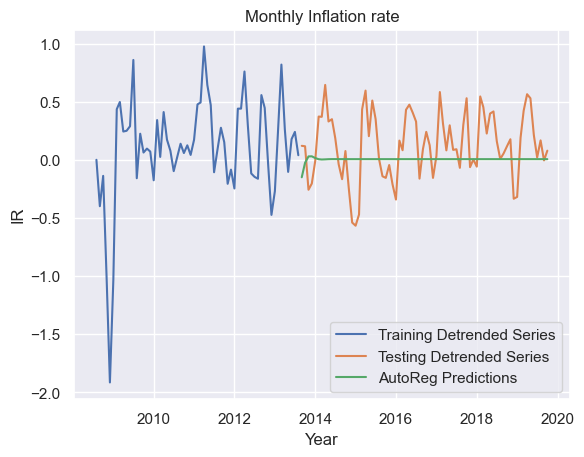

In [550]:
plt.plot(y_train.index, y_train["inflation_rate"], label = "Training Detrended Series")
plt.plot(y_test.index[:-1], y_test["inflation_rate"].values[:-1], label = "Testing Detrended Series")
plt.plot(y_test.index[:-1], ar_test_predictions[:-1], label = "AutoReg Predictions")
plt.title("Monthly Inflation rate")
plt.xlabel("Year")
plt.ylabel("IR")
plt.legend()
plt.show()

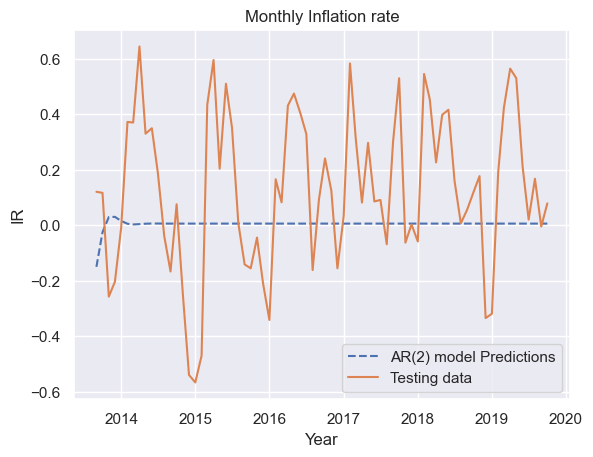

In [551]:
plt.plot(y_test.index[:-1], ar_test_predictions[:-1], label = "AR(2) model Predictions", linestyle = "--")
plt.plot(y_test.index[:-1],y_test["inflation_rate"][:-1].values, label = "Testing data")
plt.title("Monthly Inflation rate")
plt.xlabel("Year")
plt.ylabel("IR")
plt.legend()
plt.show()

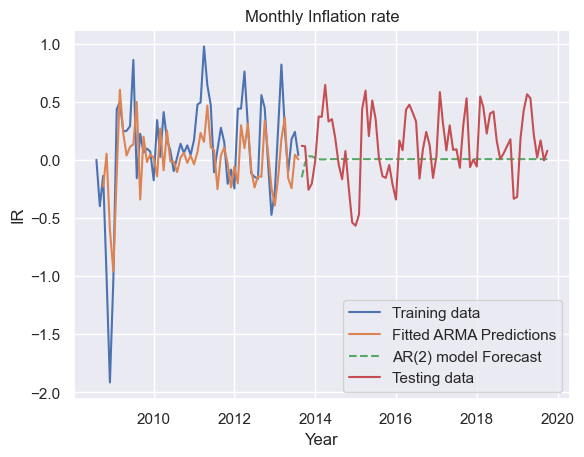

In [552]:
plt.plot(y_train.index, y_train["inflation_rate"], label = "Training data")
plt.plot(y_train.index, ar_preds, label = "Fitted ARMA Predictions")
plt.plot(y_test.index[:-1], ar_test_predictions[:-1], label = "AR(2) model Forecast", linestyle = "--")
plt.plot(y_test.index[:-1],y_test["inflation_rate"][:-1].values, label = "Testing data")
plt.title("Monthly Inflation rate")
plt.xlabel("Year")
plt.ylabel("IR")
plt.legend()
plt.show()

#### Inflation Rate from BER

In [590]:
ber_data_path = "D:/Artificial Intelligence/MITMicroMasters/DataAnalysis/Module4/Homework/T10YIE.csv"
ber_dataset = pd.read_csv(ber_data_path, parse_dates=["DATE"])
ber_dataset["BER Rates"] = ber_dataset['T10YIE'] / 100.0
ber_dataset[ber_dataset['DATE'] > "2009-9"]

,DATE,T10YIE,BER Rates
1739,2009-09-02,1.58,0.0158
1740,2009-09-03,1.64,0.0164
1741,2009-09-04,1.75,0.0175
1742,2009-09-07,NaN,NaN
1743,2009-09-08,1.81,0.0181
...,...,...,...
4388,2019-10-29,1.61,0.0161
4389,2019-10-30,1.57,0.0157
4390,2019-10-31,1.54,0.0154
4391,2019-11-01,1.59,0.0159


In [592]:
train_dataset[train_dataset['DATE'] > "2009-9"]

,CPI,inflation_rate,DATE
405,98.63766,0.0,2009-09-02
406,98.63766,0.0,2009-09-03
407,98.63766,0.0,2009-09-04
408,98.63766,0.0,2009-09-05
409,98.63766,0.0,2009-09-06
...,...,...,...
1860,106.75510,0.0,2013-08-27
1861,106.75510,0.0,2013-08-28
1862,106.75510,0.0,2013-08-29
1863,106.75510,0.0,2013-08-30


In [571]:
average_ber_yearly = ber_dataset.groupby([ber_dataset.DATE.dt.year, ber_dataset.DATE.dt.month])['BER Rates'].mean()
average_ber_yearly = np.power(average_ber_yearly + 1, 1/12) - 1
average_ber_yearly[2013,2]

0.002104418522466567

In [572]:
ber_dataset[(ber_dataset["DATE"] >= "2013-01-01") & (ber_dataset["DATE"] <= "2013-02-28")]["T10YIE"].mean()

2.53825

In [573]:
y_train["DATE"] = y_train.index
y_train

,CPI,inflation_rate,inflation_rate_log,DATE
date,,,,
2008-08-01,100.52510,0.000000,0.000000,2008-08-01
2008-09-01,100.12380,-0.399204,-0.400003,2008-09-01
2008-10-01,99.98538,-0.138249,-0.138344,2008-10-01
2008-11-01,98.97539,-1.010138,-1.015274,2008-11-01
2008-12-01,97.07973,-1.915284,-1.933863,2008-12-01
...,...,...,...,...
2013-04-01,106.37890,0.261448,0.261107,2013-04-01
2013-05-01,106.26830,-0.103968,-0.104022,2013-05-01
2013-06-01,106.45750,0.178040,0.177882,2013-06-01


In [626]:
train_dataset_ber = ber_dataset[(ber_dataset["DATE"] >= "2008-08") & (ber_dataset["DATE"] <= "2013-08")]
test_dataset_ber = ber_dataset[ber_dataset["DATE"] >= "2013-09"]

test_dataset_ber

,DATE,T10YIE,BER Rates
2782,2013-09-02,NaN,NaN
2783,2013-09-03,2.10,0.0210
2784,2013-09-04,2.07,0.0207
2785,2013-09-05,2.06,0.0206
2786,2013-09-06,2.07,0.0207
...,...,...,...
4388,2019-10-29,1.61,0.0161
4389,2019-10-30,1.57,0.0157
4390,2019-10-31,1.54,0.0154
4391,2019-11-01,1.59,0.0159


In [595]:
y_train['inflation_rate'].values

array([ 0.        , -0.39920378, -0.13824885, -1.01013768, -1.91528428,
       -1.03424263,  0.43524021,  0.49727523,  0.24317937,  0.24963608,
        0.28888014,  0.85898721, -0.15856233,  0.2242907 ,  0.06255218,
        0.09631269,  0.0707631 , -0.17611003,  0.34174612,  0.02492237,
        0.4106321 ,  0.17368983,  0.07750548, -0.09763423,  0.02112205,
        0.13806731,  0.05817373,  0.12452397,  0.04205998,  0.17188942,
        0.47630742,  0.49312675,  0.97508597,  0.64391047,  0.47050309,
       -0.10710081,  0.08860315,  0.27574384,  0.1518361 , -0.20628819,
       -0.08436739, -0.24664204,  0.44001135,  0.44030407,  0.7594893 ,
        0.30209723, -0.1173556 , -0.14662883, -0.16295886,  0.55653083,
        0.44621783, -0.03895808, -0.47382787, -0.26926434,  0.29572293,
        0.81898832,  0.26144776, -0.10396799,  0.17803992,  0.24000187,
        0.03945161])

In [596]:
np.array(train_dataset["CPI"][1:].values - train_dataset["CPI"][:-1].values).sum()

6.755099999999999

In [597]:
train_dataset['inflation_rate'] = 0.0
train_dataset['inflation_rate'] = train_dataset['inflation_rate'].round(decimals = 7)
train_dataset["inflation_rate"] = np.append([0.0],np.array((train_dataset["CPI"][1:].values - train_dataset["CPI"][:-1].values) 
                                         / train_dataset["CPI"][:-1].values) * 100.0)

In [598]:
if "DATE" not in train_dataset.columns:
    train_dataset['DATE'] = train_dataset.index
    train_dataset.reset_index(inplace = True)
    train_dataset.drop(columns = ['date'], inplace = True)

In [599]:
train_dataset[train_dataset['inflation_rate'] > 0]

,CPI,inflation_rate,DATE
8,100.52510,0.525100,2008-08-01
192,96.49385,0.435240,2009-02-01
220,96.97369,0.497275,2009-03-01
251,97.20951,0.243179,2009-04-01
281,97.45218,0.249636,2009-05-01
312,97.73370,0.288880,2009-06-01
342,98.57322,0.858987,2009-07-01
404,98.63766,0.224291,2009-09-01
434,98.69936,0.062552,2009-10-01
465,98.79442,0.096313,2009-11-01


In [600]:
train_dataset_ber

,DATE,T10YIE,BER Rates
1456,2008-08-01,2.34,0.0234
1457,2008-08-04,2.34,0.0234
1458,2008-08-05,2.30,0.0230
1459,2008-08-06,2.27,0.0227
1460,2008-08-07,2.24,0.0224
...,...,...,...
2756,2013-07-26,2.15,0.0215
2757,2013-07-29,2.16,0.0216
2758,2013-07-30,2.17,0.0217
2759,2013-07-31,2.22,0.0222


In [627]:
train_dataset_merged = train_dataset.merge(train_dataset_ber, on=['DATE'])
res = train_dataset_ber.groupby([train_dataset_ber.DATE.dt.year, train_dataset_ber.DATE.dt.month])['BER Rates'].mean()
test_exog = test_dataset_ber.groupby([test_dataset_ber.DATE.dt.year, test_dataset_ber.DATE.dt.month])['BER Rates'].mean()
test_exog

DATE  DATE
2013  9       0.021455
      10      0.021873
      11      0.021705
      12      0.021633
2014  1       0.022262
                ...   
2019  7       0.017527
      8       0.015864
      9       0.015870
      10      0.015609
      11      0.016150
Name: BER Rates, Length: 75, dtype: float64

In [603]:
res

DATE  DATE
2008  8       0.022095
      9       0.018362
      10      0.010618
      11      0.006383
      12      0.002464
                ...   
2013  4       0.024114
      5       0.022832
      6       0.020485
      7       0.021223
      8       0.022600
Name: BER Rates, Length: 61, dtype: float64

In [ ]:
test_exog = train_dataset_ber.groupby([train_dataset_ber.DATE.dt.year, train_dataset_ber.DATE.dt.month])['BER Rates'].mean()

In [584]:
train_dataset_merged = train_dataset_merged.dropna()

In [585]:
train_dataset_merged.head()

,CPI,inflation_rate,DATE,T10YIE,BER Rates
0,100.12380,0.0,2008-09-30,1.60,0.0160
1,99.98538,0.0,2008-10-31,0.87,0.0087
2,97.07973,0.0,2008-12-31,0.11,0.0011
3,96.97369,0.0,2009-03-31,1.28,0.0128
4,97.20951,0.0,2009-04-30,1.47,0.0147


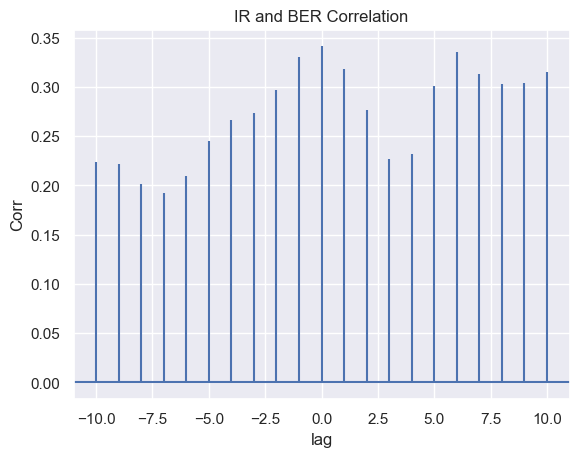

In [606]:
plt.xcorr(y_train['inflation_rate'],res.values)
plt.title("IR and BER Correlation")
plt.xlabel("lag")
plt.ylabel("Corr")
plt.show()

In [611]:
sarimax_model = SARIMAX(y_train['inflation_rate'],exog = res.values).fit()
predictions = sarimax_model.predict()
predictions

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2008-08-01    0.191263
2008-09-01    0.060351
2008-10-01   -0.195810
2008-11-01   -0.063392
2008-12-01   -0.527880
                ...   
2013-04-01    0.517466
2013-05-01    0.224812
2013-06-01    0.021847
2013-07-01    0.184079
2013-08-01    0.224650
Freq: MS, Name: predicted_mean, Length: 61, dtype: float64

In [612]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         inflation_rate   No. Observations:                   61
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -26.099
Date:                Wed, 07 Aug 2024   AIC                             58.198
Time:                        09:16:57   BIC                             64.531
Sample:                    08-01-2008   HQIC                            60.680
                         - 08-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.6563      5.683      1.523      0.128      -2.482      19.794
ar.L1          0.5155      0.081      6.348      0.000       0.356       0.675
sigma2         0.1371      0.019      7.104      0.000       0.099       0.175
===================================================================================
Ljung-Box (L1) (Q):                   1.09   Jarque-Bera (JB):                16.65
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.56
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [648]:
sarimax_model.params

x1        8.656284
ar.L1     0.515496
sigma2    0.137071
dtype: float64

In [620]:
sarimax_model.model_orders

{'trend': 0,
 'exog': 1,
 'ar': 1,
 'ma': 0,
 'seasonal_ar': 0,
 'seasonal_ma': 0,
 'reduced_ar': 1,
 'reduced_ma': 0,
 'exog_variance': 0,
 'measurement_variance': 0,
 'variance': 1}

In [632]:
predictions

2008-08-01    0.191263
2008-09-01    0.060351
2008-10-01   -0.195810
2008-11-01   -0.063392
2008-12-01   -0.527880
                ...   
2013-04-01    0.517466
2013-05-01    0.224812
2013-06-01    0.021847
2013-07-01    0.184079
2013-08-01    0.224650
Freq: MS, Name: predicted_mean, Length: 61, dtype: float64

In [637]:
max(4,2)

4

In [646]:
def calculate_month_ahead_rmse(model, training_predictions, test_data, exog_data):
    coeffs = model.params
    model_ar_order = model.model_orders['ar']
    model_ma_order = model.model_orders['ma']
    model_exog_order = model.model_orders['exog']
    k = max(model_ar_order,model_ma_order)
    
    past = [training_predictions[i] for i in range(len(training_predictions) - k, len(training_predictions))]
    exog_past = [training_predictions[i] for i in range(len(training_predictions) - k, len(training_predictions))]
    const_expr = coeffs[0]
    ar_coeffs = [coeffs[i] for i in range(1, 1 + model_ar_order)]
    ma_coeffs = [coeffs[i] for i in range(1 + model_ar_order, 1 + model_ar_order + model_ma_order)]
    exog_coeffs = [coeffs[i] for i in range(1 + model_ar_order + model_ma_order, 
                                            1 + model_ar_order + model_ma_order + model_exog_order)]
    
    for t in range(len(test_data)):
        current_past_len = len(past)
        lags = [past[i] for i in range(current_past_len-k,length)]
        pred = coeffs[0]
        for d in range(len(ar_coeffs)):
            pred += 
    
    print(ar_coeffs)
    print(exog_coeffs)

In [647]:
calculate_month_ahead_rmse(sarimax_model, predictions, y_test['inflation_rate'], test_exog)

[0.5154959590573026]
[0.13707113735957716]


C:\Users\Mohamed Emad\AppData\Local\Temp\ipykernel_13276\3260347209.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  past = [training_predictions[i] for i in range(len(training_predictions) - k, len(training_predictions))]
C:\Users\Mohamed Emad\AppData\Local\Temp\ipykernel_13276\3260347209.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  exog_past = [training_predictions[i] for i in range(len(training_predictions) - k, len(training_predictions))]
C:\Users\Mohamed Emad\AppData\Local\Temp\ipykernel_13276\3260347209.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

In [649]:
len(y_test)

75

In [651]:
sarima_forecasts = sarimax_model.get_forecast(75, exog = test_exog)
sarima_forecasts

In [652]:
sarima_forecasts.summary_frame()

inflation_rate,mean,mean_se,mean_ci_lower,mean_ci_upper
2013-09-01,0.105210,0.370231,-0.620430,0.830850
2013-10-01,0.147834,0.416528,-0.668547,0.964214
2013-11-01,0.166492,0.427990,-0.672352,1.005337
2013-12-01,0.176235,0.430984,-0.668478,1.020949
2014-01-01,0.187020,0.431776,-0.659246,1.033286
...,...,...,...,...
2019-07-01,0.151721,0.432063,-0.695107,0.998549
2019-08-01,0.137320,0.432063,-0.709507,0.984148
2019-09-01,0.137375,0.432063,-0.709452,0.984203
2019-10-01,0.135117,0.432063,-0.711711,0.981944


In [655]:
sarima_test_pred = sarimax_model.predict(start = 61, end = 135, exog = test_exog)
sarima_test_pred

2013-09-01    0.105210
2013-10-01    0.147834
2013-11-01    0.166492
2013-12-01    0.176235
2014-01-01    0.187020
                ...   
2019-07-01    0.151721
2019-08-01    0.137320
2019-09-01    0.137375
2019-10-01    0.135117
2019-11-01    0.139799
Freq: MS, Name: predicted_mean, Length: 75, dtype: float64

In [684]:
mean_squared_error(sarima_test_pred[:-1], y_test['inflation_rate'][:-1], squared = False)

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

0.2773616648541945

In [681]:
def grid_search_sarima(ar_range = 3, ma_range = 3, exog_lags = [0,6]):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    train_exog = np.zeros((len(y_train['inflation_rate']), len(exog_lags)))
    test_exog = np.zeros((len(y_test['inflation_rate']), len(exog_lags)))
    for ar in range(1, ar_range + 1):
        for ma in range(1, ma_range + 1):
            for exog_lag in range(len(exog_lags)):
                train_exog[:,exog_lag] = train_dataset_ber.groupby([train_dataset_ber.DATE.dt.year, 
                                                                    train_dataset_ber.DATE.dt.month])['BER Rates'].mean().values
                test_exog[:,exog_lag] = test_dataset_ber.groupby([test_dataset_ber.DATE.dt.year, 
                                                                  test_dataset_ber.DATE.dt.month])['BER Rates'].mean().values
            sarimax_model = SARIMAX(y_train['inflation_rate'], exog = train_exog, order = [ar, 0, ma]).fit()
            predictions = sarimax_model.predict()
            sarima_test_pred = sarimax_model.predict(start = 61, end = 135, exog = test_exog)
            rmse = mean_squared_error(sarima_test_pred[:-1], y_test['inflation_rate'][:-1])
            print(f"RMSE for AR({ar}) and MA({ma}) with an external regressors lag of {exog_lags} = {rmse}")

In [682]:
import warnings, math


In [683]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
grid_search_sarima()

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\util

RMSE for AR(1) and MA(1) with an external regressors lag of [0, 6] = 0.07669782071977434
RMSE for AR(1) and MA(2) with an external regressors lag of [0, 6] = 0.07719237086875454


D:\Tools\anaconda3\envs\6.86x\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaco

RMSE for AR(1) and MA(3) with an external regressors lag of [0, 6] = 0.07787977918938505
RMSE for AR(2) and MA(1) with an external regressors lag of [0, 6] = 0.07696932338221552


D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

RMSE for AR(2) and MA(2) with an external regressors lag of [0, 6] = 0.08016905727868492
RMSE for AR(2) and MA(3) with an external regressors lag of [0, 6] = 0.0778925637931846


D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

RMSE for AR(3) and MA(1) with an external regressors lag of [0, 6] = 0.07712848443669801
RMSE for AR(3) and MA(2) with an external regressors lag of [0, 6] = 0.07842406146877531
RMSE for AR(3) and MA(3) with an external regressors lag of [0, 6] = 0.07872993706681838


D:\Tools\anaconda3\envs\6.86x\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Tools\anaco